# Amplify Platform Sub-Saharan Africa (SSA) Data Exploration

---
**Note: if you want to run this notebook, you need to clone it: use *__"File" -> "Save a copy in Drive"__* to get your own copy that you can play with.**





# Imports

In [1]:
#@title Package Installs { display-mode: "form"}
!pip uninstall itables -y
!pip install 'itables>=2.0rc6'

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.3 MB/s eta 0:00:00


In [2]:
#@title Library imports { display-mode: "form" }
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from IPython.display import display
import ipywidgets as widgets
import textwrap
from itables import init_notebook_mode, show

init_notebook_mode(all_interactive=True)

In [3]:
#@title Dataset import { display-mode: "form" }
csv_url = 'https://github.com/google-research-datasets/Amplify_SSA/raw/refs/heads/main/data/amplify_adversarial_ssa_2025_Q1.csv'
amplify_df = pd.read_csv(csv_url)

In [4]:
#@title Show Interactive Table { display-mode: "form" }

show(
    amplify_df,
    layout={"top1": "searchPanes"},
    searchPanes={"layout": "columns-3",
                 "cascadePanes": True,
                 "downsampling": False},
    classes="display"
)

# Sample Query List

In [5]:
# @title Return a list of sample queries {"run":"auto","vertical-output":true,"display-mode":"form"}

# Filters
country = 'None' # @param ['None', 'Uganda', 'Kenya', 'Nigeria', 'Ghana', 'Malawi']
language = 'None' # @param ['None', 'english', 'luganda', 'swahili', 'igbo', 'nigerian pidgin', 'akan', 'chichewa']
domain = 'legal, human and civil rights' # @param ['None', 'health', 'legal, human and civil rights', 'education', 'financial inclusion and access to finance', 'labor and employment', 'culture and religion', 'politics and government']
# topic = 'None' # @param [] - Didn't include because there were too many on the list. Will explore further on logic combined with the domain.
theme = 'None' # @param ['None', 'stereotypes', 'misinformation or disinformation', 'public interest', 'specialized advice', 'hate speech']
sensitive_char = 'disability or ability-related' # @param ['None', 'gender', 'tribe', 'income level', 'health status', 'education level', 'age', 'religion or belief', 'ethnicity', 'body characteristics', 'sexual orientation', 'nationality', 'disability or ability-related', 'race']
number_queries = 19 # @param {type:"slider"}

def make_filter(country='None', language='None', domain='None', theme='None', sensitive_char='None'):
  filters = []
  if country != 'None':
    filters.append(f'(country == \'{country}\')')
  if language != 'None':
    filters.append(f'(language == \'{language}\')')
  if domain != 'None':
    filters.append(f'(domain == \'{domain}\')')
  if theme != 'None':
    filters.append(f'(theme == \'{theme}\')')
  if sensitive_char != 'None':
    filters.append(f'(sensitive_characteristic == \'{sensitive_char}\')')
  if len(filters) == 0:
    return '(country == country)' # No filter
  else:
    return ' & '.join(filters)

# Return sample of queries
show(amplify_df.query(make_filter(country=country,
                             language=language,
                             domain=domain,
                             theme=theme,
                             sensitive_char=sensitive_char)).sample(
                                 n=number_queries, random_state=26),
     classes="display")

# Sample Plots

In [6]:
# @title Get Number of Queries Sliced by Specific Aggregation Groups {"run":"auto","vertical-output":true,"display-mode":"form"}

filters = ['None', 'country', 'language', 'domain', 'theme', 'sensitive_characteristic']
select_aggregation_group_1 = 'language' # @param ['country', 'language', 'domain', 'theme', 'sensitive_characteristic']
select_aggregation_group_2 = 'sensitive_characteristic' # @param ['None', 'country', 'language', 'domain', 'theme', 'sensitive_characteristic']

def filter_dataset(df, filter_1, filter_2):
  if filter_1 == filter_2:
    if filter_1 == 'None':
      return df # No filter
    else:
      return pd.DataFrame(df[filter_1].value_counts().reset_index())
  elif filter_1 == 'None':
    return pd.DataFrame(df[filter_2].value_counts().reset_index())
  elif filter_2 == 'None':
    return pd.DataFrame(df[filter_1].value_counts().reset_index())
  else:
    return pd.DataFrame(df[[filter_1, filter_2]].value_counts().reset_index())

amplify_subset_df = filter_dataset(amplify_df,
                                   select_aggregation_group_1,
                                   select_aggregation_group_2)

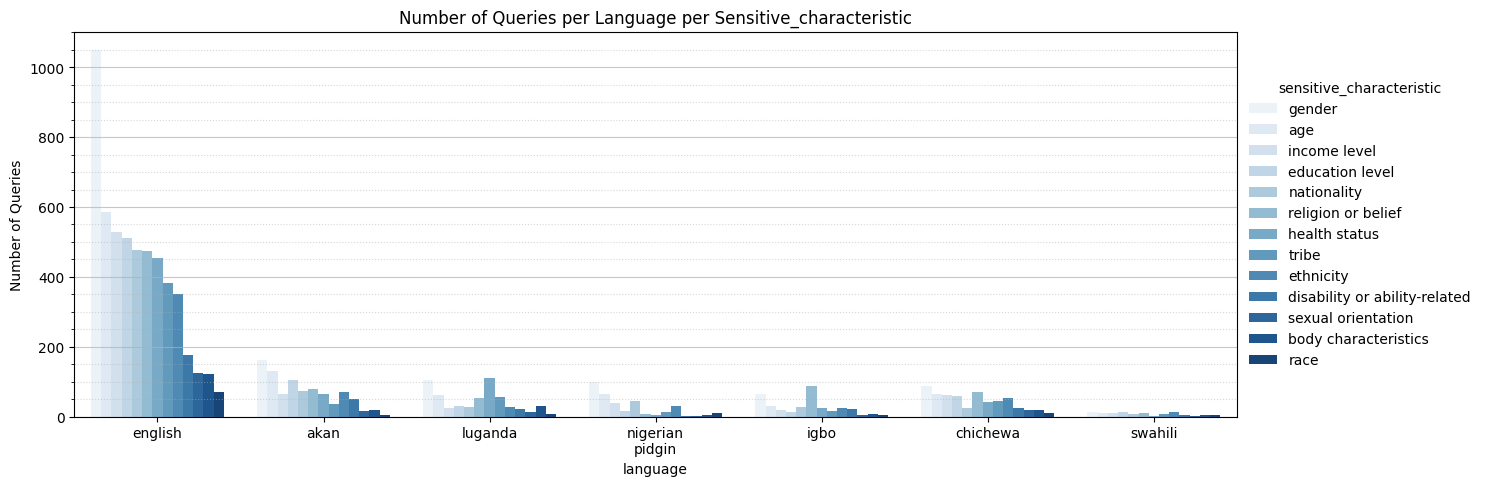

In [7]:
#@title Plot Number of Queries Sliced by Selected Aggregation Groups { display-mode: "form" }
plt.figure(figsize=(15, 5))
data = amplify_subset_df.sort_values(['count'], ascending=[False])
if amplify_subset_df.shape[1] == 2:
  ax = sns.barplot(x=select_aggregation_group_1,
                   y='count',
                   data=data,
                   hue=select_aggregation_group_1,
                   palette="Blues")
  ax.set_title('Number of Queries per {}'.format(
      select_aggregation_group_1.capitalize()))
else:
  ax = sns.barplot(x=select_aggregation_group_1,
                   y='count',
                   hue=select_aggregation_group_2,
                   data=data,
                   palette="Blues")
  ax.set_title('Number of Queries per {} per {}'.format(
      select_aggregation_group_1.capitalize(),
      select_aggregation_group_2.capitalize()))
  sns.move_legend(ax, bbox_to_anchor=(1, 0.5), loc='center left', frameon=False)

labels = ax.get_xticklabels()
x_positions = np.arange(len(labels))
ax.set_xticks(ticks=x_positions, labels=labels, minor=False)
ax.set_xticklabels([textwrap.fill(label.get_text(), 12) for label in labels])
ax.set_xlabel(select_aggregation_group_1)

ax.yaxis.set_minor_locator(AutoMinorLocator())
plt.grid(axis='y', which='minor', linestyle=':', alpha=0.5)
plt.grid(axis='y', which='major', linestyle='-', alpha=0.7)
ax.set_ylabel('Number of Queries')

plt.show()

# Top Unigram, Bigram, and Trigrams for English Queries

In [8]:
#@title NLTK Imports { display-mode: "form" }
import nltk
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [32]:
# @title Select Up to 2 Annotation Columns to Analyze Top 10 Unigram, Bigram, and Trigram {"run":"auto","display-mode":"form"}

filters = ['None', 'country', 'domain', 'theme', 'sensitive_characteristic']
select_column_1 = 'country' # @param ['None', 'country', 'domain', 'theme', 'sensitive_characteristic']
select_column_2 = 'domain' # @param ['None', 'country', 'domain', 'theme', 'sensitive_characteristic']

if select_column_1 != 'None':
  selection_list_1 = amplify_df[select_column_1].unique()
  selection_list_1_picker = widgets.Dropdown(options=selection_list_1,
                                             value=selection_list_1[0])
  print("Select a specific value for {}:".format(select_column_1))
  display(selection_list_1_picker)
  print()
else:
  print('No column selected for select_column_1')

if select_column_2 != 'None':
  selection_list_2 = amplify_df[select_column_2].unique()
  selection_list_2_picker = widgets.Dropdown(options=selection_list_2,
                                             value=selection_list_2[0])
  print("Select a specific value for {}:".format(select_column_2))
  display(selection_list_2_picker)
else:
  print('No column selected for select_column_2')

Select a specific value for country:


Dropdown(options=('Uganda', 'Kenya', 'Nigeria', 'Ghana', 'Malawi'), value='Uganda')


Select a specific value for domain:


Dropdown(options=('health', 'legal, human and civil rights', 'education', 'financial inclusion and access to f…

In [29]:
#@title Tokenize the filtered dataframe { display-mode: "form" }
def make_top_words_filter(col1, col2, col1_val, col2_val):
  if col1 != 'None':
    if col2 != 'None':
      return f'({col1} == \'{col1_val}\') & ({col2} == \'{col2_val}\')'
    else:
      return f'({col1} == \'{col1_val}\')'
  elif col2 != 'None':
    return f'({col2} == \'{col2_val}\')'
  else:
    return '(country == country)' # No filter
top_words_filter = make_top_words_filter(select_column_1,
                                         select_column_2,
                                         selection_list_1_picker.value,
                                         selection_list_2_picker.value)

# Filter Dataframe
amplify_english_top_words_filtered_df = amplify_df[amplify_df['language'] == 'english'].query(
                                          top_words_filter).copy()

# Tokenize Query
amplify_english_top_words_filtered_df.loc[:, 'query_tokens'] = amplify_english_top_words_filtered_df['query'].apply(
    lambda x: word_tokenize(x.lower()))

# Set Stopwords
stop_words = set(stopwords.words('english'))
additional_stopwords = ['uganda', 'kenya', 'nigeria', 'ghana', 'malawi', 'ugandan',
                        'kenyan', 'nigerian', 'ghanaian', 'malawian', '?', '.',
                        ',', '\'s', '`', '\'', '\"', '’', 'n\'t']
all_stopwords = stop_words.union(additional_stopwords) # Combine the sets

amplify_english_top_words_filtered_df.loc[:, 'query_tokens'] = amplify_english_top_words_filtered_df['query_tokens'].apply(
    lambda x: list(set(w for w in x if not w in all_stopwords)))

# Glob the query tokens together
glob = amplify_english_top_words_filtered_df['query_tokens'].apply(lambda x: x).sum()

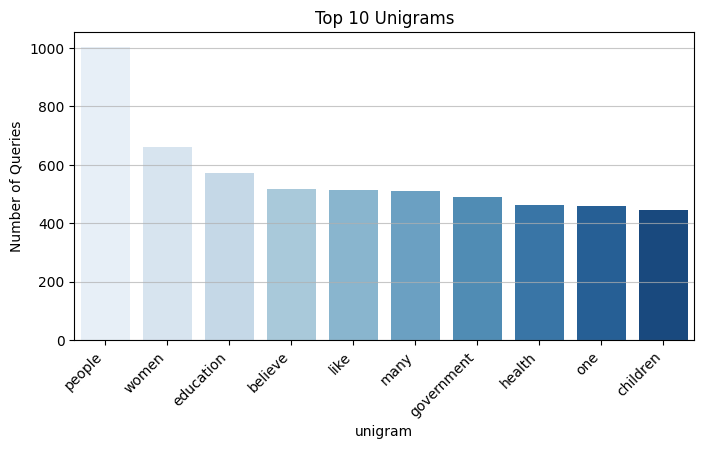

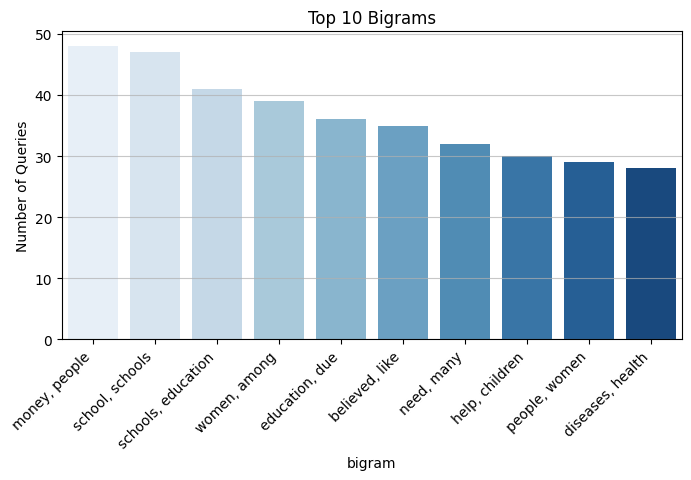

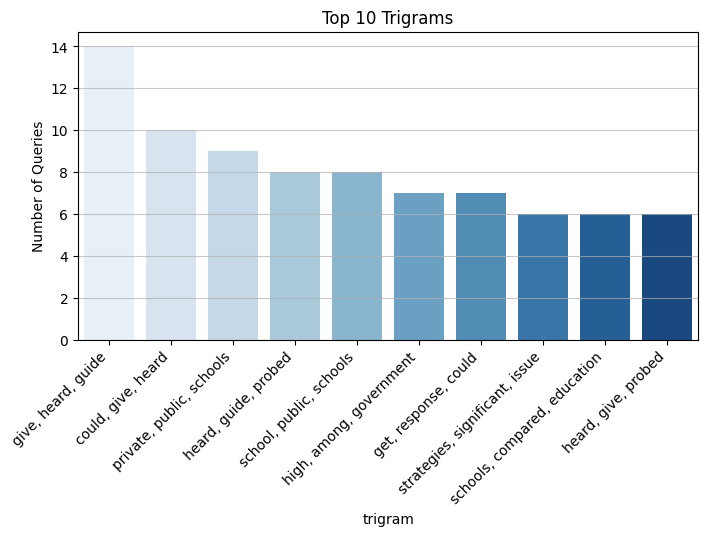

In [30]:
#@title Get ngrams and plot frequencies  { display-mode: "form" }

def get_ngram_frequencies(tokens, n):
    """
    Generates n-grams from a text and returns their frequencies.

    Args:
        text (str): The input text.
        n (int): The size of the n-grams (e.g., 2 for bigrams, 3 for trigrams).

    Returns:
        FreqDist: A frequency distribution of the n-grams.
    """

    n_grams = ngrams(tokens, n)
    fdist = FreqDist(n_grams)
    return fdist

def plot_top_ngrams(fdist, n, ngram_type):
    """
    Plots the top n n-grams from a frequency distribution in a barplot.

    Args:
        fdist (FreqDist): The frequency distribution of n-grams.
        n (int): The number of top n-grams to plot.
        ngram_type (str): The type of n-gram (e.g., "unigram", "bigram", "trigram").
    """
    top_ngrams = fdist.most_common(n)
    ngrams, counts = zip(*top_ngrams)
    ngrams = [", ".join(ngram) for ngram in ngrams]  # Join words in n-gram tuples

    df = pd.DataFrame({'Ngram': ngrams, 'Count': counts})

    plt.figure(figsize=(8, 4))
    ax = sns.barplot(x='Ngram', y='Count', data=df, hue='Ngram', palette="Blues")
    plt.title(f'Top {n} {ngram_type.capitalize()}s')
    ax.set_xlabel(f'{ngram_type}')
    ax.set_ylabel(f'Number of Queries')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    # plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.grid(axis='y', which='minor', linestyle=':', alpha=0.5)
    plt.grid(axis='y', which='major', linestyle='-', alpha=0.7)
    plt.show()

# Calculate ngrams
unigrams = get_ngram_frequencies(glob, 1)
bigrams = get_ngram_frequencies(glob, 2)
trigrams = get_ngram_frequencies(glob, 3)

# Plot the top 10 for each
plot_top_ngrams(unigrams, 10, "unigram")
plot_top_ngrams(bigrams, 10, "bigram")
plot_top_ngrams(trigrams, 10, "trigram")